# loading R 

In [1]:
%load_ext rpy2.ipython

# loading CSV file

In [2]:
import pandas as pd

df = pd.read_csv('./data/qualtrics/Topic_Item_Assessment_June+11,+2024_14.12.csv').iloc[2:].reset_index().drop(columns=['index'])
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,doc5,model,topic_id,NPMI,usefulness_first,slider,slider_lower,slider_upper,neg_val_question,neg_val_text
0,2024-06-10 08:18:56,2024-06-10 08:23:35,IP Address,72.49.152.229,100,278,True,2024-06-10 08:23:36,R_3j09tQREDezo88h,NaN,...,Possibly the most realistic weight loss post y...,scholar,12,0.0212092739912056,False,ninety,86,99,related_to_dataset,These words are <strong>not related </strong>t...
1,2024-06-10 08:19:40,2024-06-10 08:24:35,IP Address,174.102.168.236,100,294,True,2024-06-10 08:24:36,R_1s5W2FZA50E1XSx,NaN,...,Therapy 22.10.19 // part 2 // weight going dow...,scholar,1,0.0648666244147022,False,thirty,26,39,related_to_dataset,These words are <strong>not related </strong>t...
2,2024-06-10 08:18:58,2024-06-10 08:24:43,IP Address,99.1.206.185,100,344,True,2024-06-10 08:24:43,R_3QnlYbEv3dP43UO,NaN,...,‼️GIVEAWAY ALERT‼️<br>Extremely excited to ann...,stm,5,0.0830811799332058,False,ten,6,19,suprised_of_AI,I am <strong> not surprised </strong>that a co...
3,2024-06-10 08:18:41,2024-06-10 08:24:47,IP Address,174.70.58.152,100,366,True,2024-06-10 08:24:48,R_3wyItBC0ZYnwGtj,NaN,...,veggin' out like ✌🏼✌🏼✌🏼 busy busy day but ther...,lda,6,0.0685144885545312,False,sixty,56,69,suprised_of_AI,I am <strong> not surprised </strong>that a co...
4,2024-06-10 08:18:50,2024-06-10 08:25:53,IP Address,73.143.151.181,100,422,True,2024-06-10 08:25:54,R_3zNipkdUtZY8qAt,NaN,...,"I'm not single, I'm just dating myself 💐<br><b...",stm,10,0.0508991229139362,False,eighty,76,89,expect,I would<strong> not expect</strong> to see the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2024-06-10 08:44:19,2024-06-10 09:10:13,IP Address,184.158.238.213,100,1553,True,2024-06-10 09:10:14,R_7IX9jeBDbnYk4Xw,NaN,...,Apparently I'm away more than I'm at home at t...,stm,12,0.0386036760839043,False,ten,6,19,expect,I would<strong> not expect</strong> to see the...
121,2024-06-10 09:24:00,2024-06-10 09:37:42,IP Address,91.219.212.93,100,821,True,2024-06-10 09:37:43,R_1Pu9ANVdoxwDhYu,NaN,...,March On!⠀<br>.⠀<br>.#quoteoftheweek by @srwpo...,lda,5,-0.0376365650484674,False,twenty,16,29,clear,It is <strong>not clear</strong> why these wor...
122,2024-06-10 09:39:10,2024-06-10 09:46:07,IP Address,108.194.200.239,100,417,True,2024-06-10 09:46:08,R_1LA7ewlUvoqJxNT,NaN,...,"I'm a goddess, don't get it twisted<br><br>ps-...",bertopic,12,0.1671956471462582,False,ten,6,19,suprised_of_AI,I am <strong> not surprised </strong>that a co...
123,2024-06-10 08:19:50,2024-06-10 10:33:58,IP Address,24.196.99.174,100,8048,True,2024-06-10 10:33:59,R_8Kveoz3NTjlPuT3,NaN,...,the other day i asked you on my story: what's ...,stm,8,0.0318481973876285,False,ninety,86,99,suprised_of_AI,I am <strong> not surprised </strong>that a co...


number of data collected

In [3]:
df = df[df.prolific_id_question.str.len() > 5]
print('number of collected data: {0}'.format(len(df)))

number of collected data: 125


committment check

In [4]:
df = df[df.Commitment_question == 'Yes, I will.']
print('number of data after commitment check: {0}'.format(len(df)))

number of data after commitment check: 125


In [12]:
df = df[~pd.isna(df.set_slider_check_1)]
print('number of data after droping  slider_chek == Nan: {0}'.format(len(df)))

number of data after droping  slider_chek == Nan: 122


drop the ones who did not pass slider check

In [13]:
idx = []

df.set_slider_check_1 = df.set_slider_check_1.astype(int)
df.slider_upper = df.slider_upper.astype(int)
df.slider_lower = df.slider_lower.astype(int)

for i,row in df.iterrows():
    if row.set_slider_check_1>row.slider_upper or  row.set_slider_check_1<row.slider_lower:
        # print(row.set_slider_check_1,row.slider,row.slider_lower,row.slider_upper)
        idx.append(i)


df = df.drop(idx)

print('number of data after slider check: {0}'.format(len(df)))

number of data after slider check: 122


/var/folders/86/nw630jn16nsg2zqycwy774640000gn/T/ipykernel_7157/4261400774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.set_slider_check_1 = df.set_slider_check_1.astype(int)
/var/folders/86/nw630jn16nsg2zqycwy774640000gn/T/ipykernel_7157/4261400774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.slider_upper = df.slider_upper.astype(int)
/var/folders/86/nw630jn16nsg2zqycwy774640000gn/T/ipykernel_7157/4261400774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

dropping the ones who timed out!

In [14]:
import datetime

idx = []

for i,row in df.iterrows():
    if (datetime.datetime.strptime(row.EndDate,'%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(row.StartDate,'%Y-%m-%d %H:%M:%S')).seconds > 3360:
        idx.append(i)

df = df.drop(idx)

print('number of data after timeout: {0}'.format(len(df)))

number of data after timeout: 120


list of people we should pay!

In [15]:
print(','.join(set(df.prolific_id_question)))

663a4c8ddfb8b416fef61741,5c670a430d80fd00014264f9,6159d4026fd4e22c9f1179c1,66231fc6e1ecba676935943a,62fba37f3560a85b4eb94aac,6275757da6d861932cb9beb4,5c74e7e9c3fe130001e86cc8,62a96f8f6ab7e0c3ce90095f,6642567dfa2ae8171e023eb5,66083f910aeb017b4edee86f,6575fb1c1a04b30cfb2832d5,6483f9ebf7986bdbdbc0598c,6627003ffd49b5d83b6460d8,613e002e81f4b2409b531dbd,665b8af68b6a66d2c0bf6782,66293cc1dcfaa310dd0f711b,5ef319f3058d7f0178266918,6594720fa43b97e09c261749,61001ece83189b8ffa1bd0cc,5f558a5eb6604495cc52268d,660ee9b478309bf1643a9637,65fb039ac70d0817d16edae3,66609fbd324bd52e8dbcd494,662c4b36960bb85f6f77fc6e,60fd115f00f1920bc06e5740,6318be45a49442eee3a88cb3,603e86969a3fd3ec23e64a13,5700616b8a49c7000d0c73ad,5cd08e2ff59e0a0013563602,63614899ad49a91f1ef09067,659fd1389d94cbd1108b5d9e,655f96e689f922fe983fed35,5c6f2e7632cb70000169b490,664656476c6c90dfd2bbc96d,6661e08115e817751ecbffd6,63106ea4e8fe9c6cd32bf358,5d1e2045a37a4d001a1fc2cb,63fc721b7b73b5da09e9e8b6,5d29d6bd30fa6f0015cd4a75,664f5d097e95613ce719db78,

negative valence and Mars Check

In [16]:
neg_val_map = {'clear':'clear_1','related_to_dataset':'related_to_corpus_1',
              'suprised_of_AI':'suprised_of_AI_1','expect':'expect_1',}


import datetime

idx = []

for i,row in df.iterrows():
    val = 100-int(row.neg_val_check_1)
    check = int(row[neg_val_map[row.neg_val_question]])
    if (check-10>val or val>check+10) and (row.mars != 'Never') :
        idx.append(i)
        # print(row.neg_val_question,row.neg_val_check_1,row[neg_val_map[row.neg_val_question]])
        # print(row.mars)


df = df.drop(idx)

print('number of data after negative valence & Mars check: {0}'.format(len(df)))

number of data after negative valence & Mars check: 119


checking data distribution

/var/folders/86/nw630jn16nsg2zqycwy774640000gn/T/ipykernel_7157/662402430.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(df.usefulness_1))


<Axes: ylabel='Density'>

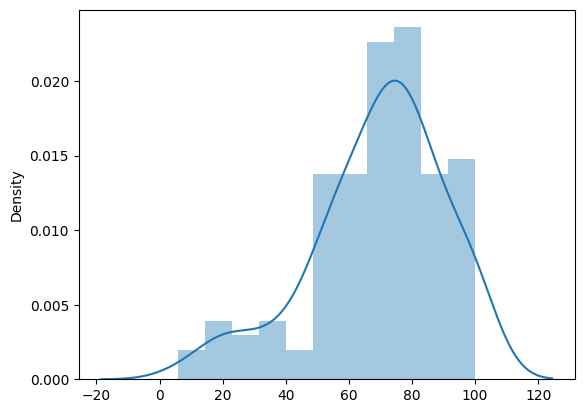

In [17]:
# df.topic_id,df.model
import seaborn as sns

sns.distplot(list(df.usefulness_1))

lets check the text input

In [9]:
# print('\n'.join(list(df.participant_criteria)))
print('\n'.join(list(df.participant_criteria.dropna())))

disgusting words with little social value
travel
Water melon
i could explain the relationship to a stranger
Relevance to context
cookie
healing
nutrition
parents 
indulge


In [12]:
import collections
# df.usefulness_1,df.usefulness_first_1
# df[["usefulness_first_1","usefulness_1","theme_representation"]].groupby("theme_representation").sum()

df.usefulness_first_1 = df.usefulness_first_1.astype(float)
df.usefulness_1 = df.usefulness_1.astype(float)
print(df[["usefulness_first_1","theme_representation"]].dropna().groupby("theme_representation").mean())
df[["usefulness_1","theme_representation"]].dropna().groupby("theme_representation").mean()

# df[df.topic_id=='11'].doc1

                                                    usefulness_first_1
theme_representation                                                  
five associated documents                                    60.166667
ten representative words                                     81.750000
ten representative words and five associated do...           71.153846


,usefulness_1
theme_representation,
five associated documents,54.8
ten representative words,77.0
ten representative words and five associated documents,66.0


In [14]:
udf = df[["usefulness_1","theme_representation"]].dropna()
udf['order'] = "last"
udf['rating'] = udf.usefulness_1

ldf = df[["usefulness_first_1","theme_representation"]].dropna()
ldf['order'] = "first"
ldf['rating'] = ldf.usefulness_first_1

use_df = pd.concat([udf,ldf])
use_df = use_df.drop(columns=["usefulness_first_1","usefulness_1"])
use_df

,theme_representation,order,rating
1,five associated documents,last,82.0
5,ten representative words,last,80.0
7,ten representative words and five associated d...,last,70.0
8,ten representative words and five associated d...,last,67.0
12,five associated documents,last,59.0
14,ten representative words,last,92.0
15,five associated documents,last,10.0
16,ten representative words,last,100.0
17,ten representative words,last,100.0
19,ten representative words,last,50.0


In [74]:
%%R -i use_df

# print(dim(use_df))
print(summary(analysis.variance <- aov(rating ~ as.factor(order) * as.factor(theme_representation),data=use_df)))
TukeyHSD(analysis.variance)

                                                 Df Sum Sq Mean Sq F value
as.factor(order)                                  1    621   621.3   1.359
as.factor(theme_representation)                   2   4642  2321.2   5.079
as.factor(order):as.factor(theme_representation)  2      1     0.5   0.001
Residuals                                        54  24680   457.0        
                                                  Pr(>F)   
as.factor(order)                                 0.24877   
as.factor(theme_representation)                  0.00953 **
as.factor(order):as.factor(theme_representation) 0.99895   
Residuals                                                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rating ~ as.factor(order) * as.factor(theme_representation), data = use_df)

$`as.factor(order)`
                diff       lwr      upr     p adj
last-first -6.43

In [16]:
grp_df = use_df
grp_df['group'] = [str(i)+'-'+str(j) for i,j in zip(use_df.theme_representation,use_df.order)]

{'five associated documents-first',
 'five associated documents-last',
 'ten representative words and five associated documents-first',
 'ten representative words and five associated documents-last',
 'ten representative words-first',
 'ten representative words-last'}

In [78]:
%%R -i grp_df

# print(dim(grp_df$value))
group_mean<- aggregate(x= grp_df$rating,by = list(grp_df$group),FUN = mean)
print(var(group_mean))#between group variance

s <- 0
vals = c()
for (i in 1:60)
{
    v <- (grp_df$rating[i] - group_mean[group_mean$Group.1 == grp_df$group[i],"x"])^2
    s <- s + v
    
    # vals[i] <- v
}
print(s/60)
# print(var(vals))
# rownames(group_mean) <- group_mean$Group.1
# print(group_mean)

# gaov = aov(rating~group,data=grp_df)
# grandmean = as.vector(gaov$"(Intercept)"[[1]][1])
# within = summary(gaov)$"Error: Within"[[1]]$"Mean Sq" 
# dfRun = summary(gaov)$"Error: Run"[[1]]$"Df"
# dfWithin = summary(gaov)$"Error: Within"[[1]]$"Df"
# Run = summary(gaov)$"Error: Run"[[1]]$"Mean Sq"
# between = (Run-within)/((dfWithin/(dfRun+1))+1)
# print(c('between: ',between,as.vector(gaov$"(Intercept)"[[1]][1])))
# print(ls(gaov))

between <- 103.6474
within <- 411.3396

power.anova.test(groups = 6, between.var = between, within.var = within,power = .80,sig.level=0.05)

# print(summary(analysis.variance <- aov(rating ~ as.factor(group),data=grp_df)))
# print(TukeyHSD(analysis.variance))

        Group.1        x
Group.1      NA       NA
x            NA 103.6474
[1] 411.3396

     Balanced one-way analysis of variance power calculation 

         groups = 6
              n = 11.14112
    between.var = 103.6474
     within.var = 411.3396
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group



In addition: Warning message:
In var(group_mean) : NAs introduced by coercion


# n_factors

In [18]:
tdf = df[['distinct_1', 'imagine_1', 'expect_1', 'unusual_1', 'clear_1', 'unrelated_1', 'coherent_1', 'offensive_1', 'meaningful_1', 'arbitrary_1', 'specific_perspective_1', 'confusing_1', 'one_theme_1', 'strange_1', 'general_theme_1', 'could_offend_1', 'easy_label_1', 'insight_1', 'one_randomly_added_1', 'new_way_of_thinking_1', 'neg_val_check_1', 'more_information_1', 'prefer_differently_1', 'agree_1', 'different_themes_1', 'specific_theme_1', 'do_not_fit_1', 'curious_to_know_more_1', 'emotion_1', 'label_consensus_1', 'missing_1', 'important_1', 'two_plus_random_1', 'sensible_1', 'biased_1', 'label_confident_1', 'related_to_corpus_1', 'influence_thinking_1']]
for col in tdf.columns:
    tdf.loc[:,col] = pd.to_numeric(tdf[col])
# list(df.columns)
# set(df.theme_representation)

In [19]:
%%R

library(EGAnet)
library(nFactors)
library(parameters)


EGAnet (version 1.2.3) 
For help getting started, type browseVignettes("EGAnet")
 
For bugs and errors, submit an issue to <https://github.com/hfgolino/EGAnet/issues>
Loading required package: lattice

Attaching package: ‘nFactors’

The following object is masked from ‘package:lattice’:

    parallel



In [21]:
%%R -i tdf

result <- n_factors(tdf, type = "FA",  rotation = "oblimin",  algorithm = "minres",  package = c('EGAnet','psych','nFactors','fit','PCDimension'))
# result <- n_factors(tdf, type = "FA",  rotation = "varimax",  algorithm = "minres",  package = c('EGAnet','psych','nFactors','fit','PCDimension'))
print(summary(result))
as.data.frame(result)

   n_Factors n_Methods
1          1         1
2          2         1
3          3         2
4          4         4
5          6         1
6          8         2
7         17         2
8         18         2
9         19         1
10        20         1
11        22         1
12        27         1
13        29         2
14        30         1
   n_Factors              Method              Family
1          1 Acceleration factor               Scree
2          2          Scree (R2)            Scree_SE
3          3                 CNG                 CNG
4          3 Optimal coordinates               Scree
5          4                beta Multiple_regression
6          4        EGA (glasso)                 EGA
7          4          EGA (TMFG)                 EGA
8          4                 BIC                 Fit
9          6             Fit_off                 Fit
10         8   Parallel analysis               Scree
11         8    Kaiser criterion               Scree
12        17       

Loading required namespace: GPArotation


Factor Analysis using method =  minres
Call: fa(r = tdf, nfactors = 4, rotate = "oblimin", fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
                         MR1   MR4   MR2   MR3    h2   u2 com
distinct_1              0.30  0.09  0.23  0.07 0.146 0.85 2.2
imagine_1               0.92  0.18  0.05 -0.05 0.695 0.31 1.1
expect_1               -0.65  0.27  0.14  0.01 0.708 0.29 1.5
unusual_1               0.89  0.09  0.11  0.00 0.733 0.27 1.1
clear_1                -0.58  0.39  0.18  0.01 0.772 0.23 2.0
unrelated_1             0.66 -0.10  0.12  0.18 0.641 0.36 1.3
coherent_1             -0.72  0.25  0.21  0.02 0.824 0.18 1.4
offensive_1             0.49  0.17  0.26  0.19 0.364 0.64 2.1
meaningful_1           -0.61  0.13  0.46  0.04 0.710 0.29 2.0
arbitrary_1             0.73  0.01  0.14  0.19 0.692 0.31 1.2
specific_perspective_1  0.00  0.08  0.43 -0.12 0.236 0.76 1.2
confusing_1             0.88  0.04  0.02  0.17 0.884 0.12 1.1
one_theme_1        

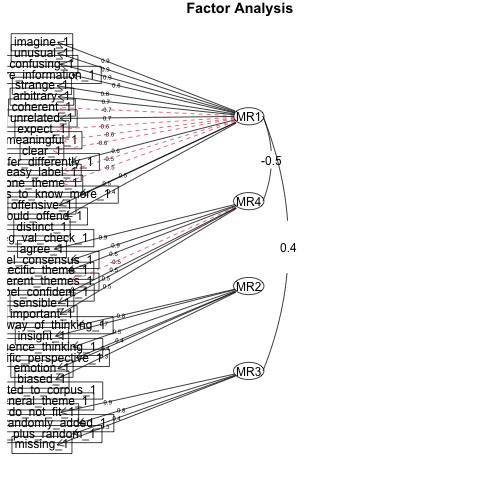

In [22]:
%%R -i tdf

library(psych) #loading fa (Factor Analysis library)
library(GPArotation)



efa.model <- fa(tdf,nfactors = 4,fm='minres',rotate='oblimin')
diagram(efa.model)
efa.model